In [36]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import operator
import pandas as pd
import seaborn as sns

from collections import Counter
from nltk.tokenize import PunktSentenceTokenizer
from nltk.chunk import RegexpParser
!pip install nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TMRNEW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TMRNEW\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [5]:



df = pd.read_csv("/Users/TMRNEW/Documents/All_DS_Python_stuff/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False, error_bad_lines=False)

In [6]:
df.head()


,iyear,imonth,iday,country_txt,region_txt,provstate,city,specificity,vicinity,location,...,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,related
0,2000,1,1,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,2.0,0,NaN,...,0.0,7.0,0.0,NaN,-9,NaN,NaN,NaN,NaN,"200001010001, 200001010002"
1,2000,1,1,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,2.0,0,NaN,...,0.0,7.0,0.0,NaN,-9,NaN,NaN,NaN,NaN,"200001010002, 200001010001"
2,2000,1,1,India,South Asia,Jammu and Kashmir,Udhampur,1.0,0,NaN,...,NaN,2.0,0.0,NaN,-9,NaN,NaN,NaN,NaN,NaN
3,2000,1,1,Kosovo,Eastern Europe,Kosovo (Province),Peje,1.0,0,NaN,...,0.0,1.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,NaN
4,2000,1,1,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,1.0,1,The incident occurred northeast of Mogadishu.,...,0.0,10.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
freq_dist = df['country_txt'].value_counts()
freq_dist[freq_dist > 500] #number of terror attacks since the beginning of year 2000

Iraq                                24475
Afghanistan                         12607
Pakistan                            12551
India                                8918
Philippines                          4920
Somalia                              3973
Nigeria                              3826
Thailand                             3623
Yemen                                3240
Libya                                2235
Colombia                             2104
Syria                                2055
Egypt                                2004
Russia                               1866
Turkey                               1803
Ukraine                              1683
Algeria                              1350
West Bank and Gaza Strip             1287
Israel                               1173
Nepal                                1172
Bangladesh                           1079
United Kingdom                       1061
Sudan                                 891
Sri Lanka                         

In [8]:
iraq_data = df[df['country_txt'] == 'Iraq']
iraq_data['gname'].value_counts()[:10]

Unknown                                        18423
Islamic State of Iraq and the Levant (ISIL)     4797
Al-Qaida in Iraq                                 632
Islamic State of Iraq (ISI)                      145
Asa'ib Ahl al-Haqq                                67
Gunmen                                            57
Tawhid and Jihad                                  49
Al-Naqshabandiya Army                             35
Muslim extremists                                 32
Ansar al-Islam                                    28
Name: gname, dtype: int64

In [9]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
       'city', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2',
       'attacktype2_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
       'motive', 'compclaim', 'weaptype1_txt', 'weapdetail', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'related'],
      dtype='object')

In [10]:
isis_iraq_data = iraq_data[iraq_data['gname'] == 'Islamic State of Iraq and the Levant (ISIL)']

In [11]:
data = isis_iraq_data['iyear'].value_counts()
data

2016    1206
2017    1154
2014    1100
2015     996
2013     341
Name: iyear, dtype: int64

In [13]:
#how many people has ISIL killed from 2013-2017?
for year in range(2013,2018):
    num_kills = sum(isis_iraq_data['nkill'][isis_iraq_data['iyear'] == year].dropna())
    print("Number of kills by ISIL in Iraq in ", year, " = ", num_kills)

Number of kills by ISIL in Iraq in  2013  =  1347.0
Number of kills by ISIL in Iraq in  2014  =  8604.0
Number of kills by ISIL in Iraq in  2015  =  5976.0
Number of kills by ISIL in Iraq in  2016  =  9528.0
Number of kills by ISIL in Iraq in  2017  =  5603.0


In [14]:
isis_iraq_data['attacktype1_txt'].value_counts()

Bombing/Explosion                      3201
Unknown                                 635
Hostage Taking (Kidnapping)             463
Armed Assault                           339
Assassination                           100
Facility/Infrastructure Attack           41
Hostage Taking (Barricade Incident)      14
Hijacking                                 4
Name: attacktype1_txt, dtype: int64

In [15]:
isis_iraq_data[['success' ,'nkill', 'provstate']][isis_iraq_data['attacktype1_txt'] == 'Hostage Taking (Barricade Incident)']

,success,nkill,provstate
48962,1,5.0,Babil
52573,1,4.0,Al Anbar
54439,1,3.0,Kirkuk
55140,1,9.0,Saladin
56759,1,24.0,Baghdad
58448,1,9.0,Saladin
60790,1,9.0,Baghdad
63216,1,2.0,Al Anbar
72588,1,3.0,Diyala
73914,1,0.0,Kirkuk


c:\users\tmrnew\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



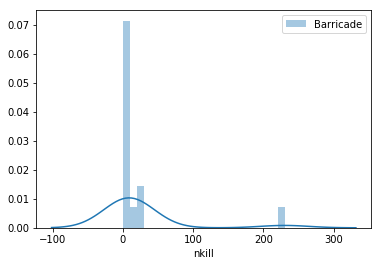

In [16]:
barricade = isis_iraq_data['nkill'][isis_iraq_data['attacktype1_txt'] == 'Hostage Taking (Barricade Incident)']
sns.distplot(barricade, label="Barricade")

plt.legend()
plt.show()

In [17]:
isis_iraq_data['attacktype1_txt'][ (isis_iraq_data['targtype1_txt'] == 'Terrorists/Non-State Militia')].value_counts()

Bombing/Explosion              75
Unknown                        29
Armed Assault                  22
Hostage Taking (Kidnapping)    16
Assassination                   9
Name: attacktype1_txt, dtype: int64

In [32]:
def text_manipulation(text, regex):
    words = nltk.word_tokenize(text.lower())
    tagged = nltk.pos_tag(words)

    chunkGram = regex
    
    chunkParser = RegexpParser(chunkGram)
    chunked = chunkParser.parse(tagged)

    candidate_keywords = []
    for tree in chunked.subtrees():
        if (tree.label() == 'PHRASE') and (len(tree.leaves()) >= 2):
            candidate_keyword = ' '.join([x for x,y in tree.leaves()])
            candidate_keywords.append(candidate_keyword)

    return Counter(candidate_keywords)

In [33]:
text = ' '.join(isis_iraq_data['summary'][isis_iraq_data['targtype1_txt'] == 'Terrorists/Non-State Militia'].dropna().tolist())
text

"06/09/2013: Assailants opened fire on a member of the Sahwa Council in Garma town, Al-Anbar governorate, Iraq. The Sahwa member was killed and two other people were injured in the attack. No group claimed responsibility for the incident; however, Islamic State of Iraq and the Levant (ISIL) was suspected of involvement in the attack. 08/06/2013: Assailants attacked a Sahwa Council checkpoint outside of Maqdadiyah city, Iraq. One attacker was killed in the ensuing clash. No group claimed responsibility for the incident; however, sources attributed the attack to Islamic State of Iraq and the Levant (ISIL). 08/22/2013: Assailants detonated an explosive device at the residence of Sheikh Ali Hussein Saleh in Al-Madaen city, Diyala governorate, Iraq. Saleh, a Sahwa Council leader, was killed in the attack along with two of his bodyguards. No group claimed responsibility for the incident; however, sources speculated that Islamic State of Iraq and the Levant (ISIL) was behind the attack. 12/30

In [37]:
common_phrases = text_manipulation(text, r""" PHRASE: {(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}""")

In [38]:
for x,y in sorted(common_phrases.items(), key=operator.itemgetter(1), reverse=True):
    if y>=2:
        print((x,y))

('islamic state of iraq', 134)
('saladin governorate', 33)
('volunteer fighters', 32)
('explosive device', 31)
('suicide bomber', 22)
('state of iraq', 19)
('explosives-laden vehicle', 15)
('al anbar', 14)
('diyala governorate', 13)
('security forces', 13)
('same day', 12)
('baghdad city', 11)
('baghdad governorate', 11)
('sahwa council members', 8)
('coordinated attacks', 8)
('suicide bombers', 8)
('sahwa council leader', 7)
('al anbar governorate', 7)
('sahwa member', 6)
('sahwa council member', 6)
('babil governorate', 6)
('sahwa members', 5)
('other people', 4)
('militia members', 4)
('volunteer forces', 4)
('reported casualties', 3)
('same night', 3)
('security members', 3)
('explosives-laden vehicles', 3)
('unknown number of assailants', 3)
('volunteer fighter commander', 3)
('ramadi city', 2)
('sahwa council building in daquq district', 2)
('family members', 2)
('samarra district', 2)
('tikrit city', 2)
('volunteer fighters in baiji district', 2)
('sahwa council checkpoint in ar